# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_ky import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Formatting
print('Beginning Data Retrieval\n-----------------------------')

# Set up URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

# set up Variables
counter = 0
cloudiness = []
country = []
date = []
humidity = []
lati = []
long = []
max_temp = []
wind_speed = []
city_list = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response_json = requests.get(query_url + city).json()
    
    try:
        
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])  
        lati.append(response_json['coord']['lat'])
        long.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        
        city_list.append(city)
        counter += 1
        
        print(f"Processing Record {counter} | {city}")
     
    except:
        print(f"City {city} not found. Skipping...")
        pass

print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')   

Beginning Data Retrieval
-----------------------------
Processing Record 1 | corinto
Processing Record 2 | mwanza
Processing Record 3 | yar-sale
Processing Record 4 | busselton
Processing Record 5 | sibu
Processing Record 6 | seka
Processing Record 7 | nome
Processing Record 8 | qaanaaq
Processing Record 9 | rikitea
City karamea not found. Skipping...
Processing Record 10 | mataura
Processing Record 11 | kodiak
Processing Record 12 | kapaa
Processing Record 13 | bethel
Processing Record 14 | albany
Processing Record 15 | norman wells
Processing Record 16 | kang
Processing Record 17 | waddan
Processing Record 18 | hobart
Processing Record 19 | sinnamary
Processing Record 20 | atuona
Processing Record 21 | asau
Processing Record 22 | castro
Processing Record 23 | cherskiy
City saleaula not found. Skipping...
Processing Record 24 | east london
Processing Record 25 | upernavik
City mys shmidta not found. Skipping...
Processing Record 26 | ewa beach
Processing Record 27 | thompson
City illo

Processing Record 222 | port lincoln
Processing Record 223 | ribeira grande
Processing Record 224 | pochutla
Processing Record 225 | sarh
Processing Record 226 | khash
Processing Record 227 | lompoc
Processing Record 228 | vilyuysk
Processing Record 229 | pangnirtung
Processing Record 230 | ende
Processing Record 231 | ilulissat
Processing Record 232 | fort-shevchenko
Processing Record 233 | nakambala
Processing Record 234 | mahebourg
Processing Record 235 | salta
Processing Record 236 | curuca
City inderborskiy not found. Skipping...
Processing Record 237 | magadan
Processing Record 238 | finnsnes
Processing Record 239 | karratha
Processing Record 240 | san policarpo
Processing Record 241 | nouadhibou
Processing Record 242 | mananjary
Processing Record 243 | zykovo
Processing Record 244 | show low
Processing Record 245 | tahe
Processing Record 246 | salalah
Processing Record 247 | iqaluit
Processing Record 248 | batemans bay
City sentyabrskiy not found. Skipping...
Processing Record 2

Processing Record 452 | zhoucheng
Processing Record 453 | kodinsk
Processing Record 454 | mamali
Processing Record 455 | sattahip
Processing Record 456 | balkhash
Processing Record 457 | sao filipe
Processing Record 458 | kolkwitz
Processing Record 459 | villa union
Processing Record 460 | leh
Processing Record 461 | ambulu
Processing Record 462 | leshukonskoye
Processing Record 463 | kloulklubed
Processing Record 464 | maslovka
Processing Record 465 | amahai
Processing Record 466 | wajima
Processing Record 467 | comodoro rivadavia
Processing Record 468 | ludvika
Processing Record 469 | salinas
Processing Record 470 | tiznit
Processing Record 471 | canaries
Processing Record 472 | alice springs
Processing Record 473 | vila franca do campo
Processing Record 474 | tatawin
Processing Record 475 | nchelenge
Processing Record 476 | tanout
Processing Record 477 | charters towers
Processing Record 478 | richards bay
Processing Record 479 | matay
Processing Record 480 | acapulco
City marcona n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City': city_list,                           
                           'Lat': lati,
                           'Lng': long,
                           'Country': country,
                           'Max Temp':max_temp,
                           'Humidity': humidity,
                           'Wind Speed':wind_speed,
                           'Cloudiness': cloudiness,
                           'Date':date
                          })

weather_df.head()

,City,Lat,Lng,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,corinto,37.9407,22.9573,GR,60.69,77,3.51,74,1635649605
1,mwanza,-2.5167,32.9000,TZ,72.01,74,6.29,94,1635649606
2,yar-sale,66.8333,70.8333,RU,4.68,90,14.14,16,1635649606
3,busselton,-33.6500,115.3333,AU,67.08,61,6.49,98,1635649606
4,sibu,2.3000,111.8167,MY,85.55,72,3.80,68,1635649606


In [5]:
# Export to CSV
weather_df.to_csv(output_data_file, index=False)

In [6]:
# Summary
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.676237,20.029431,57.928226,73.621864,7.469104,60.528674,1.635650e+09
std,33.090308,89.558156,21.502090,19.599455,5.363784,39.433262,7.695459e+01
min,-54.800000,-175.200000,-6.230000,15.000000,0.000000,0.000000,1.635649e+09
25%,-6.039150,-55.699500,43.287500,63.000000,3.655000,18.000000,1.635650e+09
50%,27.066650,25.576700,62.970000,77.000000,6.015000,75.000000,1.635650e+09
75%,49.122825,96.309625,74.607500,89.000000,10.210000,100.000000,1.635650e+09
max,78.218600,179.316700,98.150000,100.000000,34.160000,100.000000,1.635650e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

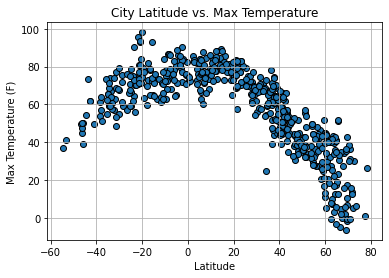

In [7]:
# Plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save plot
plt.savefig('output_data/lat_max_temp.png')

## Latitude vs. Humidity Plot

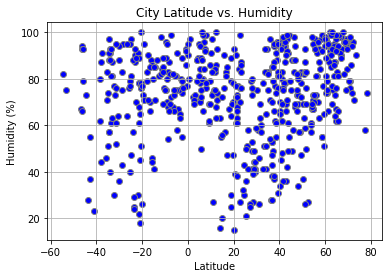

In [8]:
# Plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolor="blue", edgecolor='gray')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save plot
plt.savefig('output_data/lati_humi.png')

## Latitude vs. Cloudiness Plot

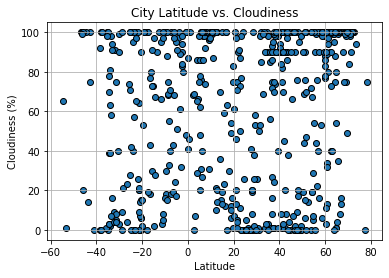

In [9]:
plt.scatter(weather_df['Lat'], weather_df["Cloudiness"], edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

plt.savefig("output_data/Cloudiness.png")

## Latitude vs. Wind Speed Plot

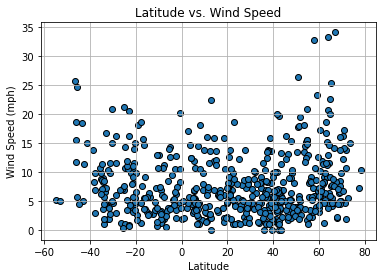

In [10]:
# Axis
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor='black')

# Plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs. Wind Speed")
plt.grid()

# Save plot
plt.savefig('output_data/lat_windSpeed.png')

## Linear Regression

In [11]:
x_n = weather_df['Lat'].loc[weather_df['Lat'] >= 0]
x_s = weather_df['Lat'].loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.8837988806068725.


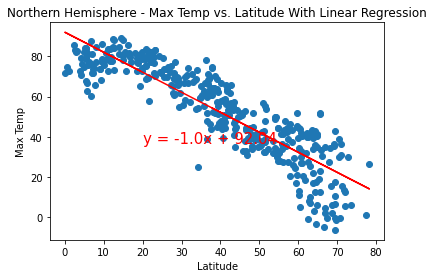

In [12]:
# Calculate the correlation coefficient and linear regression model 
y_n_tem = weather_df['Max Temp'].loc[weather_df['Lat'] >= 0]
# Correlation coefficient
correlation = st.pearsonr(x_n,y_n_tem)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n, y_n_tem)
regress_values = x_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_n, y_n_tem)
plt.plot(x_n,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude With Linear Regression")

plt.savefig("output_data/n_max_temp")

In [ ]:
## The Max Temp and Latitude inNorthern Hemisphere has a really strong relationship. When Latitude increases, max tem decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.6634762152508216.


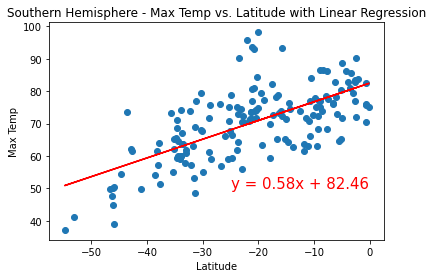

In [13]:
# Calculate the correlation coefficient and linear regression model 
y_s_tem = weather_df['Max Temp'].loc[weather_df['Lat'] < 0]
# Correlation coefficient
correlation = st.pearsonr(x_s,y_s_tem)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s, y_s_tem)
regress_values = x_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_s, y_s_tem)
plt.plot(x_s,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Southern Hemisphere - Max Temp vs. Latitude with Linear Regression')

plt.savefig("output_data/s_max_temp")

In [ ]:
## The Max Temp and Latitude in Southern Hemisphere has a really strong relationship. When Latitude increases, max tem increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.23343762891039252.


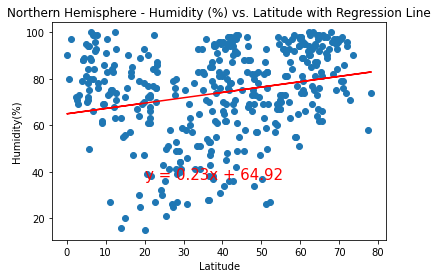

In [14]:
# Calculate the correlation coefficient and linear regression model 
y_n_hum = weather_df['Humidity'].loc[weather_df['Lat'] >= 0]
# Correlation coefficient
correlation = st.pearsonr(x_n,y_n_hum)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n, y_n_hum)
regress_values = x_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_n, y_n_hum)
plt.plot(x_n,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude with Regression Line')

plt.savefig("output_data/n_hum")

In [ ]:
## The Humidity and Latitude in Northern Hemisphere has a weak relationship. When latitude increases, humidity sligtly increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.14658143512546512.


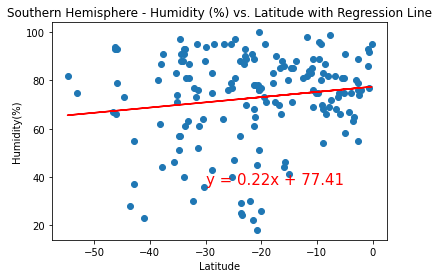

In [15]:
# Calculate the correlation coefficient and linear regression model 
y_s_hum = weather_df['Humidity'].loc[weather_df['Lat'] < 0]
# Correlation coefficient
correlation = st.pearsonr(x_s,y_s_hum)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s, y_s_hum)
regress_values = x_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_s, y_s_hum)
plt.plot(x_s,regress_values,"r-")
plt.annotate(line_eq,(-30,37),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude with Regression Line')

plt.savefig("output_data/s_hum")

In [ ]:
## The Humidity and Latitude in southern Hemisphere has a weak relationship. When latitude increases, humidity sligtly increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.13114659780135315.


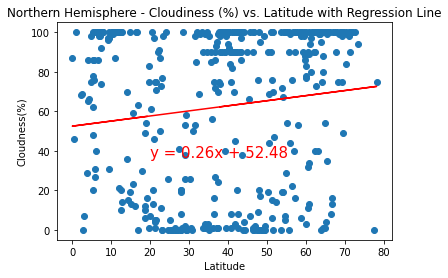

In [16]:
# Calculate the correlation coefficient and linear regression model 
y_n_clo = weather_df['Cloudiness'].loc[weather_df['Lat'] >= 0]
# Correlation coefficient
correlation = st.pearsonr(x_n,y_n_clo)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n, y_n_clo)
regress_values = x_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_n, y_n_clo)
plt.plot(x_n,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude with Regression Line')

plt.savefig("output_data/n_clo")

In [ ]:
## The cloudness and Latitude in Northern Hemisphere has a really weak relationship. When latitude increases, cloudiness sligtly increases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.11475750645796656.


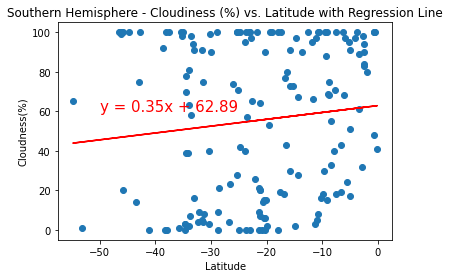

In [17]:
# Calculate the correlation coefficient and linear regression model 
y_s_clo = weather_df['Cloudiness'].loc[weather_df['Lat'] < 0]
# Correlation coefficient
correlation = st.pearsonr(x_s,y_s_clo)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s, y_s_clo)
regress_values = x_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_s, y_s_clo)
plt.plot(x_s,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude with Regression Line')

plt.savefig("output_data/s_clo")

In [ ]:
## The cloudness and Latitude in southern Hemisphere has a really weak relationship. When latitude increases, cloudiness sligtly increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.21712409724964232.
The r value is 0.21712409724964227.


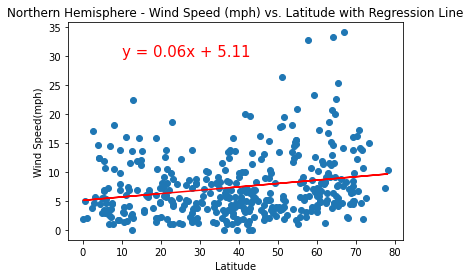

In [18]:
# Calculate the correlation coefficient and linear regression model 
y_n_win = weather_df['Wind Speed'].loc[weather_df['Lat'] >= 0]
# Correlation coefficient
correlation = st.pearsonr(x_n,y_n_win)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n, y_n_win)
regress_values = x_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r value is {rvalue}.')

plt.scatter(x_n, y_n_win)
plt.plot(x_n,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude with Regression Line')

plt.savefig("output_data/n_win")

In [ ]:
## The wind speed and Latitude in southern Hemisphere has a weak relationship. When latitude increases, wind speed sligtly increases.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.23304254947645592.
The r value is -0.23304254947645592.


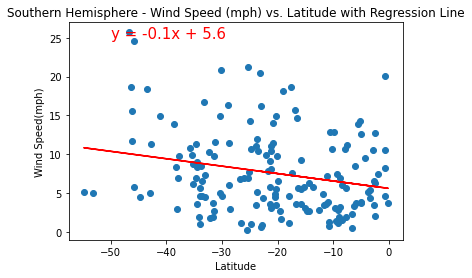

In [19]:
# Calculate the correlation coefficient and linear regression model 
y_s_win = weather_df['Wind Speed'].loc[weather_df['Lat'] < 0]
# Correlation coefficient
correlation = st.pearsonr(x_s,y_s_win)
print(f'The correlation coefficient is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s, y_s_win)
regress_values = x_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r value is {rvalue}.')

plt.scatter(x_s, y_s_win)
plt.plot(x_s,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude with Regression Line')

plt.savefig("output_data/s_win")

In [ ]:
## The wind speed and Latitude in southern Hemisphere has a weak relationship. When latitude increases, wind speed sligtly decreases.